In [1]:
#Importing required Modules
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt 
from bokeh.charts import Bar, output_file, show
from bokeh.charts.attributes import cat
%matplotlib inline
csfont = {'fontname':'Arial'}
import plotly.plotly as py
import plotly.graph_objs as go
#init_notebook_mode(connected=True)
py.sign_in('jpmora', '63aq6fwdpj')

In [2]:
#Importing database of registered dog - May 2016
datadog = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')

In [49]:
#Printing the frame head
datadog.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Animal Dominant Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10013,BILAL,M,Australian Cattledog,Rust,2014-09-01 00:00:00,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
1,10025,BUDDY,M,Unknown,BLOND,2008-04-01 00:00:00,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
2,10013,ALI,M,Basenji,Black,2014-01-01 00:00:00,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
3,10013,QUEEN,F,Akita Crossbreed,Charcoal,2013-04-01 00:00:00,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
4,10035,PAIGE SABLE ORTA,F,American Pit Bull Mix / Pit Bull Mix,White,2014-07-01 00:00:00,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12


In [4]:
#Defining the top 10 most common breeds of dog from the database
datadog['Primary Breed'].value_counts().nlargest(10)

Unknown                                 12898
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2874
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: Primary Breed, dtype: int64

In [5]:
# Converting all dog names in the DB to all caps
datadog['Animal Name']= datadog['Animal Name'].str.upper()

(array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.]), <a list of 9 Text yticklabel objects>)

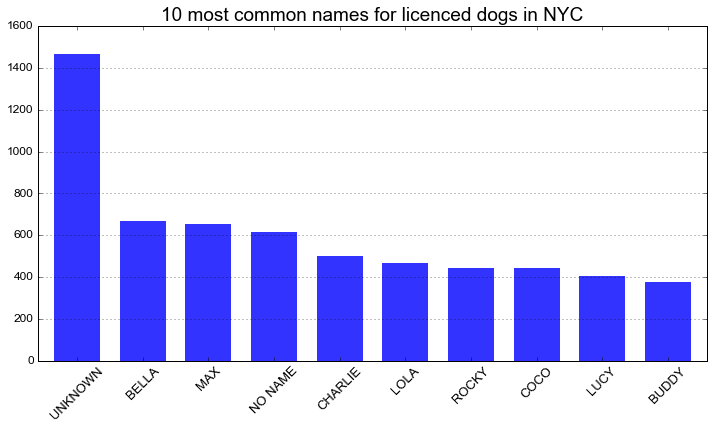

In [6]:
#Creating a plot for 10 most common names for registered dogs using Matplotlib
plt.figure()

ax = datadog['Animal Name'].value_counts().nlargest(10).plot(kind='bar', color = 'blue', figsize=(12,6), alpha=0.8, width=0.7, 
                                                    linewidth=0)
ax.yaxis.grid()
plt.title('10 most common names for licenced dogs in NYC', fontsize=19, **csfont)
plt.xticks(rotation=45, fontsize=13, **csfont)
plt.yticks(fontsize=12, **csfont)

In [7]:
#Creating a plot for 10 most common names for registered dogs using Bokeh
topnames = datadog['Animal Name'].value_counts().nlargest(10).sort_values(ascending=False)
bar = Bar(topnames, values='Animal Name', title='10 most common names for licenced dogs in NYC', filename="bar.html", 
         color="blue", title_text_font_size='40pt', plot_width=600, plot_height=400)
bar.show()

C:\Users\juanpablo\Anaconda2\lib\site-packages\bokeh\charts\chart.py:301: UserWarning:

Chart property 'filename' was deprecated in 0.11             and will be removed in the future.

C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: BokehDeprecationWarning:

bokeh.charts.chart.show was deprecated in Bokeh 0.11; please use bokeh.io.show instead



In [8]:
#Reseting the index of the new data frame created for ploting in Bokeh
topnames2 = topnames.reset_index()

In [9]:
#Creating the same plot this time using pyplot, a more iteractive ploting library
dogname = [
    go.Bar(
        x=topnames2['index'],
        y=topnames2['Animal Name'])
]
layout = go.Layout(title='10 most common dog names in NYC', titlefont=dict(family='Arial', size=26))
fig = go.Figure(data=dogname, layout=layout)
py.iplot(fig, filename='basic-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jpmora/0 or inside your plot.ly account where it is named 'basic-bar'


In [10]:
#Creating a plot for the split of dog genders from the database using bokeh 
sex = datadog['Animal Gender'].value_counts().nlargest(10).sort_values(ascending=False)[0:2]
bar1 = Bar(sex, values='Animal Gender', title='Gender distribution for licenced dogs in NYC', filename="bar.html", 
         color="red", title_text_font_size='40pt', plot_width=600, plot_height=400)
bar1.show()

C:\Users\juanpablo\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: BokehDeprecationWarning:

bokeh.charts.chart.show was deprecated in Bokeh 0.11; please use bokeh.io.show instead



In [11]:
#Reseting the index of the created dataframe
sex2 = sex.reset_index()

In [50]:
#Ploting the dataframe using pyplot in this case
dogsex = [go.Bar(x=sex2['index'], y=sex2['Animal Gender'], text=['Male', 'Female']
                 , marker=dict(color='rgb(255,0,0)'), opacity=0.6)]
layout = go.Layout(title='Gender distribution for licenced dogs in NYC', titlefont=dict(family='Arial', size=26))
fig1 = go.Figure(data=dogsex, layout=layout)
py.iplot(fig1, filename='basic-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jpmora/0 or inside your plot.ly account where it is named 'basic-bar'


In [14]:
#Creating a fraame for the 10 most common breeds of dogs
breed = datadog['Primary Breed'].value_counts().nlargest(10).sort_values(ascending=False)
breed2 = breed.reset_index()
breed2

,index,Primary Breed
0,Unknown,12898
1,Yorkshire Terrier,5133
2,Shih Tzu,4727
3,Chihuahua,3924
4,Maltese,2965
5,Labrador Retriever,2874
6,American Pit Bull Terrier/Pit Bull,2153
7,American Pit Bull Mix / Pit Bull Mix,2029
8,Labrador Retriever Crossbreed,1864
9,Beagle,1438


In [15]:
#Ploting the new dataframe using pyplot
dogbreed = [go.Bar(x=breed2['index'], y=breed2['Primary Breed'], marker=dict(color='rgb(192,192,192)'), opacity=0.7)]
layout = go.Layout(title='Top 10 most common breeds for licenced dogs in NYC', titlefont=dict(family='Arial', size=26))
fig2 = go.Figure(data=dogbreed, layout=layout)
py.iplot(fig2, filename='basic-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~jpmora/0 or inside your plot.ly account where it is named 'basic-bar'


In [16]:
#Printing the imported database columns
datadog.columns

Index([u'Owner Zip Code', u'Animal Name', u'Animal Gender', u'Primary Breed',
       u'Secondary Breed', u'Animal Dominant Color', u'Animal Secondary Color',
       u'Animal Third Color', u'Animal Birth', u'Spayed or Neut',
       u'Guard or Trained', u'Vaccinated', u'Application Date',
       u'License Issued Date', u'License Expired Date'],
      dtype='object')

In [17]:
#Creating a list from the Column names
collist = datadog.columns.tolist()

In [18]:
#Creating a list of items to remove from the colum  list
remove = [u'Secondary Breed', u'Animal Secondary Color', u'Animal Third Color']

In [19]:
#Pasing a list ccomprehension to remove the items from the remove list from the colum name list
collist = [x for x in collist if x not in remove]

In [20]:
#Printing the final result for the colum list
collist

[u'Owner Zip Code',
 u'Animal Name',
 u'Animal Gender',
 u'Primary Breed',
 u'Animal Dominant Color',
 u'Animal Birth',
 u'Spayed or Neut',
 u'Guard or Trained',
 u'Vaccinated',
 u'Application Date',
 u'License Issued Date',
 u'License Expired Date']

In [21]:
datadog = datadog[collist]

In [22]:
datadog.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Animal Dominant Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10013,BILAL,M,Australian Cattledog,Rust,2014-09-01 00:00:00,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
1,10025,BUDDY,M,Unknown,BLOND,2008-04-01 00:00:00,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
2,10013,ALI,M,Basenji,Black,2014-01-01 00:00:00,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
3,10013,QUEEN,F,Akita Crossbreed,Charcoal,2013-04-01 00:00:00,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
4,10035,PAIGE SABLE ORTA,F,American Pit Bull Mix / Pit Bull Mix,White,2014-07-01 00:00:00,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12


In [23]:
dogsum = datadog.groupby('Owner Zip Code').count().sort_values(by = 'Animal Name', ascending=False)['Animal Name']

In [24]:
dogsum = dogsum.reset_index()

In [25]:
dogsum.columns = ['postalCode', 'Number of Dogs']

In [26]:
dogsum.head()

,postalCode,Number of Dogs
0,10025,2072
1,10023,1646
2,10024,1644
3,10011,1554
4,10128,1474


In [27]:
type(dogsum['postalCode'][0])

numpy.int64

In [28]:
zipcodes = gpd.GeoDataFrame.from_file('NYCZIPS.geojson')

In [29]:
zipcodes.head()

,@id,BLDGpostal,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,borough,geometry,latitude,longitude,postalCode
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,Queens,POLYGON ((-73.86942457284177 40.74915687096788...,40.751662,-73.883573,11372
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,Queens,POLYGON ((-73.71132911125308 40.74947450816085...,40.745366,-73.711608,11004
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,Queens,POLYGON ((-73.70098278625547 40.73889569923034...,40.748714,-73.703443,11040
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,Queens,POLYGON ((-73.72270447144122 40.75373371438336...,40.736534,-73.724004,11426
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,Queens,"POLYGON ((-73.81088634744756 40.7271718757592,...",40.739903,-73.794626,11365


In [30]:
zipcodes.crs

{'init': u'epsg:4326'}

In [31]:
zipcodes = zipcodes.to_crs(epsg=3395)

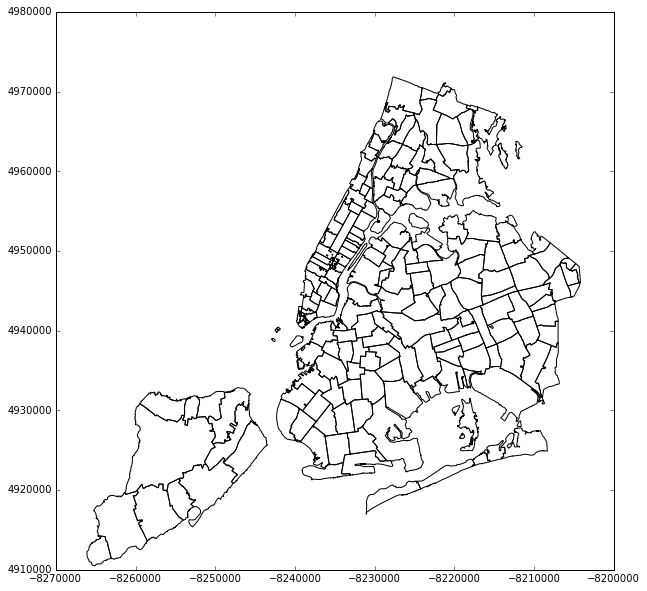

In [32]:
zipcodes.plot(alpha=0, figsize = (12,10))

In [33]:
len(dogsum)

298

In [34]:
len(zipcodes)

262

In [35]:
zipcodes['postalCode'] = zipcodes['postalCode'].astype(int)

In [36]:
geodogsum = pd.merge(zipcodes, dogsum, on= 'postalCode')

In [37]:
len(geodogsum)

204

In [38]:
geodogsum.head()

,@id,BLDGpostal,CTY_FIPS,OBJECTID,PO_NAME,STATE,ST_FIPS,borough,geometry,latitude,longitude,postalCode,Number of Dogs
0,http://nyc.pediacities.com/Resource/PostalCode...,0,081,1,Jackson Heights,NY,36,Queens,POLYGON ((-8223106.728640875 4947515.078433569...,40.751662,-73.883573,11372,550
1,http://nyc.pediacities.com/Resource/PostalCode...,0,081,2,Glen Oaks,NY,36,Queens,POLYGON ((-8205507.622360095 4947561.572938457...,40.745366,-73.711608,11004,180
2,http://nyc.pediacities.com/Resource/PostalCode...,0,081,3,New Hyde Park,NY,36,Queens,"POLYGON ((-8204355.87472978 4946013.208139954,...",40.748714,-73.703443,11040,23
3,http://nyc.pediacities.com/Resource/PostalCode...,0,081,4,Bellerose,NY,36,Queens,POLYGON ((-8206773.921663828 4948185.040709085...,40.736534,-73.724004,11426,187
4,http://nyc.pediacities.com/Resource/PostalCode...,0,081,5,Fresh Meadows,NY,36,Queens,POLYGON ((-8216590.283198051 4944297.543410451...,40.739903,-73.794626,11365,362


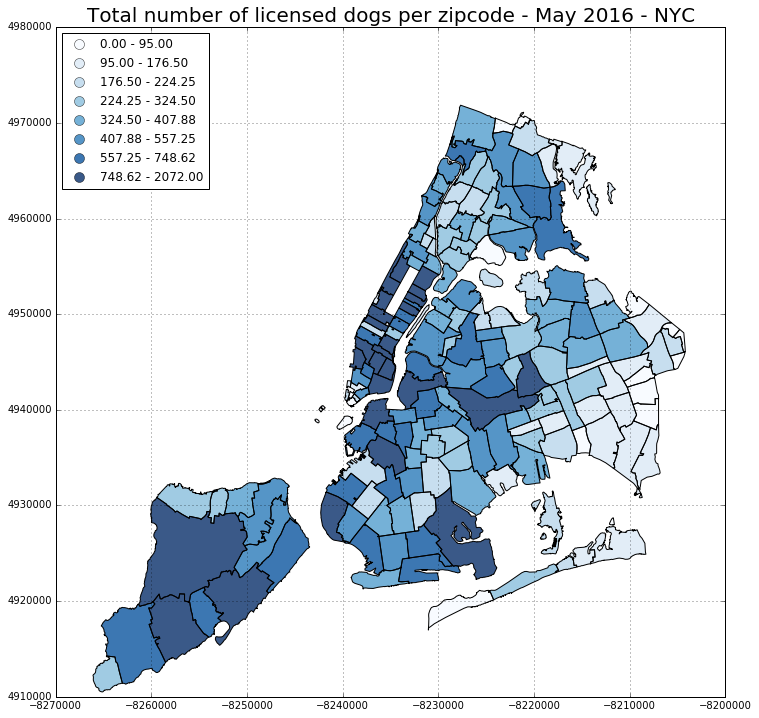

In [46]:
plt.figure()
geodogsum.plot(column='Number of Dogs', alpha=0.8, scheme = 'QUANTILES', k=8, cmap='Blues', figsize = (12,12), legend=True)
plt.grid()
plt.title("Total number of licensed dogs per zipcode - May 2016 - NYC", fontsize=20)

In [40]:
geodogsum['Zipcode Area']= geodogsum.area

In [41]:
geodogsum['Dog Density']= (geodogsum['Number of Dogs']/geodogsum['Zipcode Area'])*1000

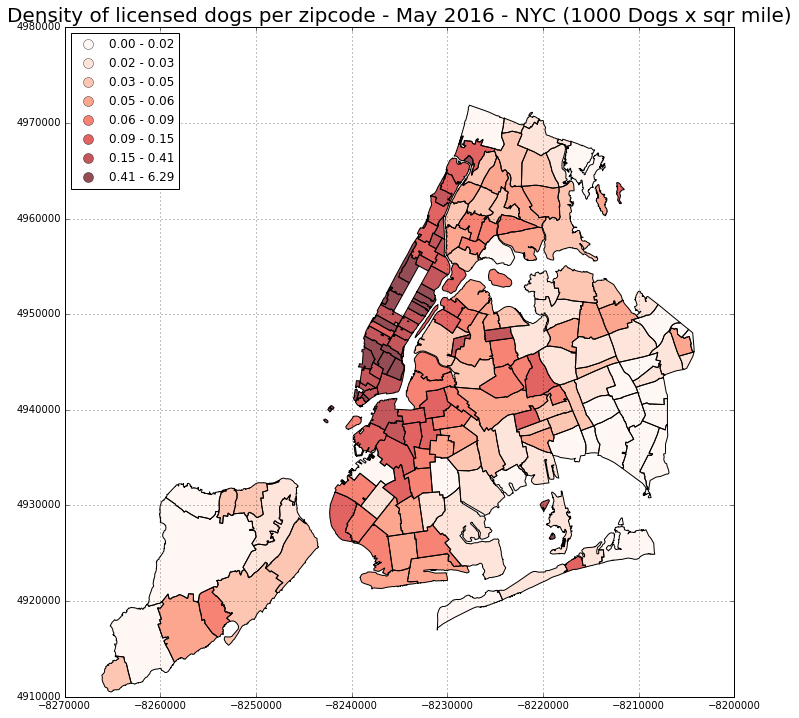

In [45]:
plt.figure()
geodogsum.plot(column='Dog Density', alpha=0.7, scheme = 'QUANTILES', k=8, cmap='Reds', figsize = (12,12), legend=True)
plt.title("Density of licensed dogs per zipcode - May 2016 - NYC (1000 Dogs x sqr mile)", fontsize=20)
plt.grid()

In [43]:
geodogsum.set_geometry('geometry', inplace=True)

In [47]:
geodogsum.columns

Index([           u'@id',     u'BLDGpostal',       u'CTY_FIPS',
             u'OBJECTID',        u'PO_NAME',          u'STATE',
              u'ST_FIPS',        u'borough',       u'geometry',
             u'latitude',      u'longitude',     u'postalCode',
       u'Number of Dogs',   u'Zipcode Area',    u'Dog Density'],
      dtype='object')

In [44]:
geodogsum.to_file('dog_1.shp')

In [48]:
geodogsum.to_file('dog_1.geojson')